In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# 1. Generate Data
np.random.seed(42)
x_train = np.linspace(-10, 10, 1000).reshape(-1, 1)  # 1000 samples, shape (1000, 1)
y_train = 2 * x_train**2 - 10 * x_train + 8  # y = 2x^2 - 10x + 8

x_test = np.linspace(-10, 10, 200).reshape(-1, 1)  # 200 test samples
y_test = 2 * x_test**2 - 10 * x_test + 8

# 2. Define the Neural Network
model = Sequential([
    Dense(4, activation='relu', input_shape=(1,)),  # Hidden Layer 1
    Dense(8, activation='relu'),                    # Hidden Layer 2
    Dense(16, activation='relu'),                   # Hidden Layer 3
    Dense(8, activation='relu'),                    # Hidden Layer 4
    Dense(4, activation='relu'),                    # Hidden Layer 5
    Dense(1, activation='linear')                  # Output Layer
])

# 3. Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 4. Train the Model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=1)

# 5. Evaluate the Model
loss, mae = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Test MAE: {mae:.4f}")
# model.save("polynomial_regression_model.h5")


2025-08-18 18:22:19.220721: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-18 18:22:19.231704: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-18 18:22:19.319824: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-18 18:22:19.393073: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755519739.474008   17986 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755519739.49

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 12457.1953 - mae: 74.4762 - val_loss: 12597.3438 - val_mae: 75.9464
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11743.3330 - mae: 72.4655 - val_loss: 12455.2461 - val_mae: 75.3784
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12340.5869 - mae: 74.8456 - val_loss: 12119.9463 - val_mae: 74.0321
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10723.5811 - mae: 68.5422 - val_loss: 11274.1875 - val_mae: 70.6804
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11757.9326 - mae: 72.6098 - val_loss: 9347.4785 - val_mae: 63.0961
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8486.1963 - mae: 60.5799 - val_loss: 6143.1914 - val_mae: 51.4763
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5287.0957 - mae: 48.0613 - val_loss: 2403.4578 - val_mae: 33.6642
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1914.6603 - mae: 31.3505 - val_loss: 778.6682 - val_mae:

Test Loss (MSE): 6.3925
Test MAE: 1.9023


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


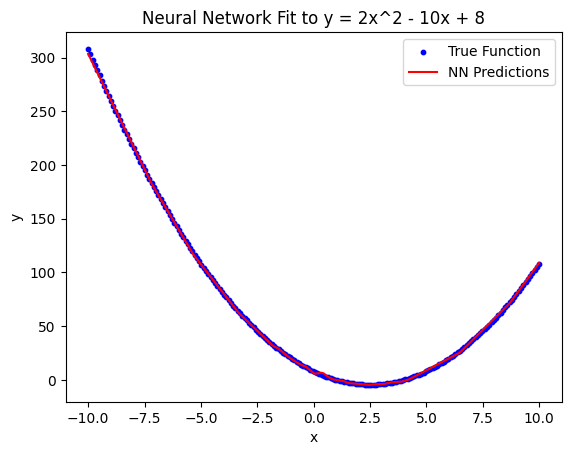

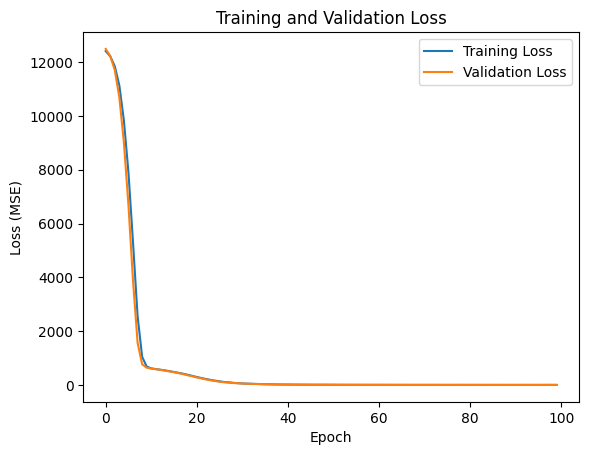

In [3]:

# 6. Make Predictions
y_pred = model.predict(x_test)

# 7. Visualize Results
plt.scatter(x_test, y_test, label='True Function', color='blue', s=10)
plt.plot(x_test, y_pred, label='NN Predictions', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Fit to y = 2x^2 - 10x + 8')
plt.legend()
plt.show()

# 8. Plot Training History
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()